# <center>  Perceptron - 06 / 10 / 2020 </center>#

* <span style="color:red">Cours</span>            : MICAS911-Introduction-To-Statistic-Learning
* <span style="color:red">Auteur</span>           : Bournhar Abdelaziz
* <span style="color:red">Auteur</span>           : Panongbene Jean Mohamed Sawadogo

# <center> <span style="color:red"><font size="+3"> Assignment Perceptron </font></span> </center> #



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline

# Data Generation

In [3]:
#bias
b = 1

# weights 
weights = np.zeros(2, dtype=int)

# learning rate
learningRate = 0.01

# loss error training 
lossTraining = list()

In [4]:
# Data Generate Gaussian Distribution
#X = np.concatenate((np.random.multivariate_normal(mu_1, matrix_cov, N//2),np.random.multivariate_normal(mu_2, matrix_cov, N//2)),axis=0)

# Label Generate
#Y = np.append(np.ones(N//2, dtype=int), np.zeros(N//2, dtype=int))

In [5]:
# We the the Gaussian Distribution
#plt.scatter(X[:,0], X[:,1], c=Y)
#plt.show()

# Percepton's logic implementation

In [6]:
def generateData(N, mu_1, mu_2, matrix_cov):
    """This function generate the data that we will use"""
    #Data Generate with Gaussain Distribution
    X1 = np.random.multivariate_normal(mu_1, matrix_cov, N//2)
    X2 = np.random.multivariate_normal(mu_2, matrix_cov, N//2)
    X = np.concatenate((X1,X2),axis=0)

    # Label Generate
    Y1 = np.ones(N//2, dtype=int)
    Y2 = np.zeros(N//2, dtype=int)
    Y = np.append(Y1,Y2)
    
    return X, Y


def plot_Data(X, Y):
    """This function plot the Gaussian Distribution"""
    plt.figure(figsize=(20,10))
    plt.scatter(X[:,0], X[:,1], c=Y)
    plt.show()
    
    
    
def plot_data_with_decision_line(X, Y, W):
    """This function plot data with decision line"""
    plt.figure(figsize=(20,10))
    
    if(W[1]==0):
        X1 = np.arange(-4-W[0],4-W[0],0.01)
    else:
        X1 = np.arange((-4-W[0])/W[1],(4-W[0])/W[1],0.01)
    Y1 = W[1]*X1+W[0]

    plt.scatter(X[:,0], X[:,1], c=Y)
    plt.plot(X1, Y1)
    plt.show()



def mixte_data(X,Y):
    """This function return the dataset and label mixted"""
    X_mixte = list()
    Y_mixte = list()
    indice = np.arange(start=0,stop=X.shape[0])
    np.random.shuffle(indice)
    
    for i in range(indice.shape[0]):
        X_mixte.append(X[indice[i]])
        Y_mixte.append(Y[indice[i]])
    
    return np.array(X_mixte), np.array(Y_mixte)


def add_the_biais_column(X):
    """This function add a biais column in X data"""
    X_training = list()

    for i in range(X.shape[0]):
        X_training.append(np.append(1,X[i]))

    return np.array(X_training)


def prediction(X, W):
    """This function return the prediction"""
    return np.heaviside(np.sum(W*X),0)


def training(X, Y, W ,learningRate):
    """This function take a sampling data and train the perceptron"""
    
    #we mixte the dataset
    X_training, Y_training = mixte_data(X,Y)
    
    # we add the biais
    X_training = add_the_biais_column(X_training)
    
    lossTraining = list()
    
    for i in range(X_training.shape[0]):
        y = prediction(X_training[i],W)
        
        error = Y_training[i]-y
        
        W = W+learningRate*(error)*X_training[i]
        lossTraining.append(np.abs(error))
        
    return W, lossTraining


def standard_deviation(E):
    """This function return the standart deviation"""
    E = np.array(E)
    
    e = np.sum(E)/E.shape[0]
    return np.sqrt((np.sum(E)-e) / E.shape[0]) 


def testing(X, Y, W):
    """This function is used to test the perceptron"""
    errors = 0
    y_pred = list()
    
    X_training = add_the_biais_column(X)
    
    for i in range(X_training.shape[0]):
        # we compute the prediction based on X and the weights W
        y_pred.append(prediction(X_training[i], W))
        
    errors = np.abs(y_pred-Y)
    
    return y_pred

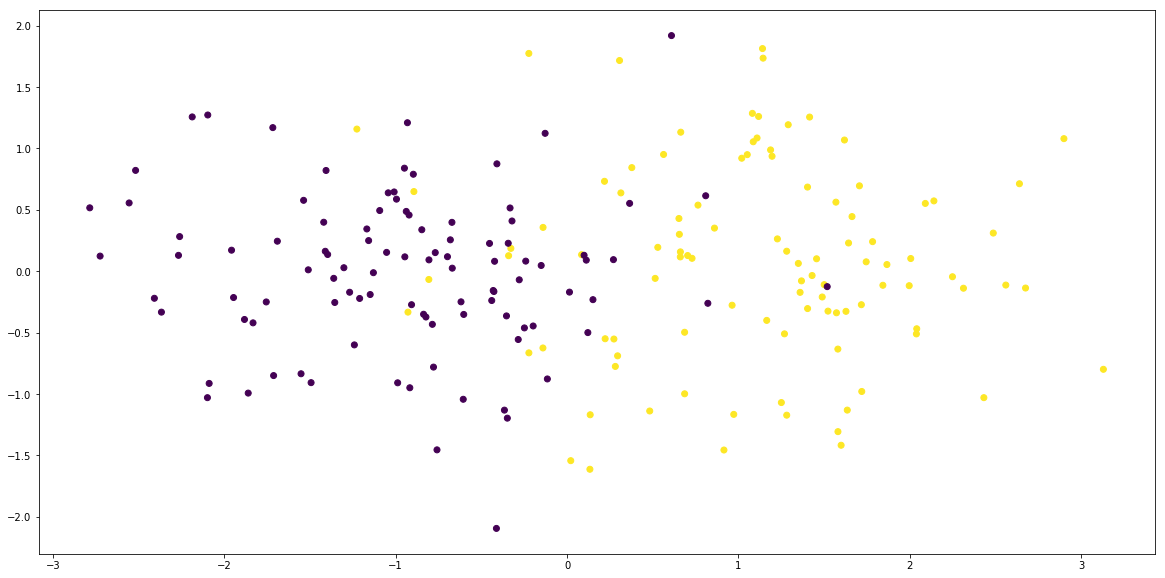

In [7]:
#The size of data is N = 200
N = 200

# Gaussian mean for distribution label 1 
mu_1 = np.array([1,0])

# Gaussian mean for distribution label 0
mu_2 = np.array([-1,0])

# standar deviation for Gaussian Distribution
sigma_ = 0.75 
matrix_cov =sigma_* np.array([[1, 0],[0, 1]])

#Generate the data
X, Y = generateData(N, mu_1, mu_2, matrix_cov)

#plot the data generator 
plot_Data(X, Y)

In [8]:
# Train the perceptron algorithm with the data generated previously
W = np.zeros(3, dtype=int)
learningRates = 1

W, lossTraining = training(X, Y, W, learningRates)

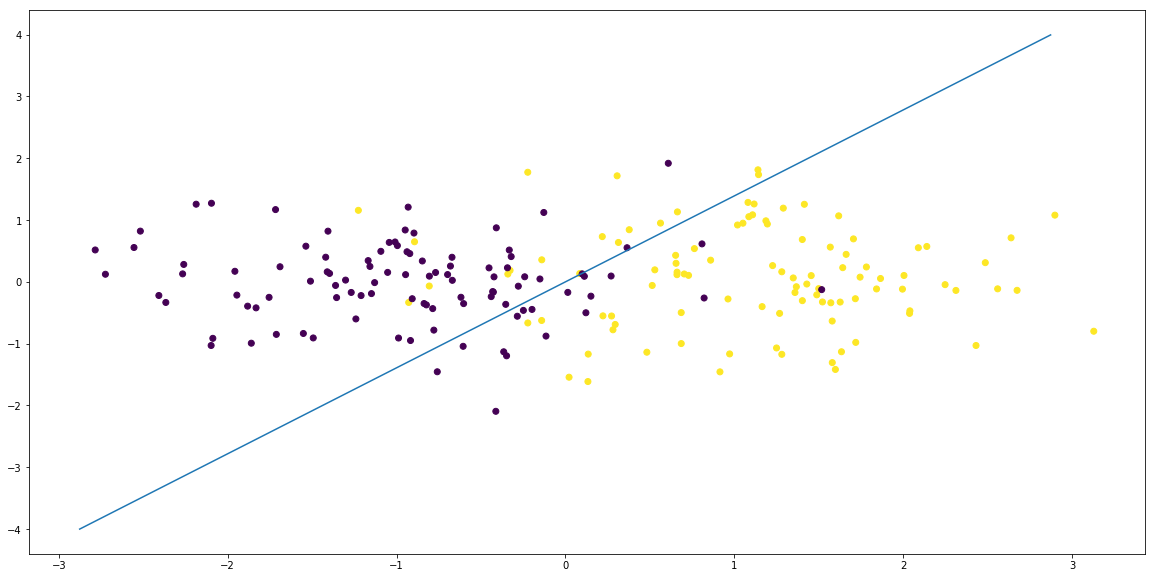

In [9]:
# Visualization of data generated with the solution
testing(X, Y, W)
plot_data_with_decision_line(X, Y, W)

## Question 2 :

In [10]:
# Size of data 
N = 500
# noise variance sigma_2
sigma_2 = [0.05, 0.25, 0.50, 0.75]

# average error of the model
average_error_sigma= list()

# standar deviation of the model
standard_deviation_sigma = list()

# learning 
learningRates = 1

In [11]:
# average error of the model
average_error_sigma= list()

# standar deviation of the model
standard_deviation_sigma = list()

for sigma in sigma_2:
    
    #Build the matrix_cov
    matrix_cov =sigma* np.array([[1, 0],[0, 1]])
    
    # initializa the weight
    W = np.zeros(3, dtype=int)
    
    # average error of the model
    average_error_= list()
    
    for i in range(50):
        
        # generate data sets
        X_train, Y_train = generateData(N, mu_1, mu_2, matrix_cov)
        X_test, Y_test = generateData(N, mu_1, mu_2, matrix_cov)

        #train the model
        W, lossTraining = training(X_train, Y_train, W, learningRates)
    
        # Test the model
        Y_predic = testing(X_test, Y_test, W)
    
        errors = np.abs(Y_predic-Y_test)
        
        average_error_.append(np.sum(errors)/N)
    
    average_error_ = np.array(average_error_)
    
    errors = 0
    for i in range(average_error_.shape[0]):
        errors +=average_error_[i]
        
    average_error_sigma.append(errors/50)
        
    standard_deviation_sigma.append(standard_deviation(np.array(average_error_)))


In [12]:
print("------------------------------------standard_deviation_error--------------------------------------")
print(average_error_sigma)
print("-------------------------------------------error--------------------------------------------------")
print(standard_deviation_sigma)


------------------------------------standard_deviation_error--------------------------------------
[0.0, 0.03648000000000002, 0.12364000000000001, 0.19752000000000003]
-------------------------------------------error--------------------------------------------------
[0.0, 0.1890777617807023, 0.34809079275384464, 0.43996545318922486]


<ErrorbarContainer object of 3 artists>

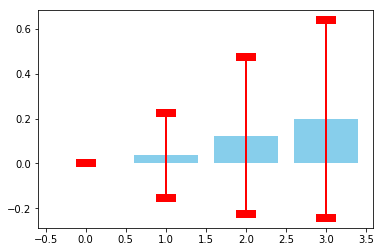

In [13]:
# plot the errors bar
values = average_error_sigma
errorValues = standard_deviation_sigma
plt.bar(range(len(values)), values, color = 'skyblue')
plt.errorbar(range(len(values)), values, yerr = errorValues,fmt = 'none', capsize = 10, ecolor = 'red', elinewidth = 2, capthick = 8)


## Comment ?

We find that the mean value of the error and the standard deviation increases gradually with the value of the variance. Thus, we can say that the larger the standard ecc deviation, the larger the error interval

## Question 3 :

In [14]:
# data size
N =200

#Generate the data with sigma_2 = 0.15
matrix_cov =0.15* np.array([[1, 0],[0, 1]])

# Gaussian mean for distribution label 1 
mu_1 = np.array([1,0])

# Gaussian mean for distribution label 0
mu_2 = np.array([-1,0])

# learning rate
learningRates = 1

# the different value of p
p_parameter = [0, 0.05, 0.1, 0.2]

# average error of the model
average_error_p = list()

# standar deviation of the model
standard_deviation_error_p = list()

def generate_data_with_p_parameter(p, N,mu_1, mu_2, matrix_cov):
    """This function generate data using methode descript in question 3"""
    X, Y = generateData(N, mu_1, mu_2, matrix_cov)
    
    for i in range(N):
        kk = np.random.binomial(1, p, 1)[0]
        if(p==1):
            Y[i] = np.abs(Y[i]-1)
            
    return X, Y

In [15]:
# average error of the model
average_error_p = list()

# standar deviation of the model
standard_deviation_error_p = list()

for p in p_parameter:
    
    #initialize the weight
    W = np.zeros(3, dtype=int)
    
    # average error of the model
    average_error_= list()
    
    for i in range(50):
        
        # generate data sets
        X_train, Y_train = generate_data_with_p_parameter(p, N, mu_1, mu_2, matrix_cov)
        X_test, Y_test = generate_data_with_p_parameter(p, N, mu_1, mu_2, matrix_cov)

        #train the model
        W, lossTraining = training(X_train, Y_train, W, learningRates)
    
        # Test the model
        Y_predic = testing(X_test, Y_test, W)
    
        errors = np.abs(Y_predic-Y_test)
        
        average_error_.append(np.sum(errors)/N)
    
    average_error_ = np.array(average_error_)
    
    errors = 0
    for i in range(average_error_.shape[0]):
        errors +=average_error_[i]
        
    average_error_p.append(errors/50)
        
    standard_deviation_error_p.append(standard_deviation(np.array(average_error_)))


In [16]:
print("------------------------------------standard_deviation_error--------------------------------------")
print(standard_deviation_error_p)
print("-------------------------------------------error--------------------------------------------------")
print(average_error_p)

------------------------------------standard_deviation_error--------------------------------------
[0.09749871794028883, 0.09391485505499117, 0.07919595949289333, 0.07408103670980853]
-------------------------------------------error--------------------------------------------------
[0.009700000000000005, 0.009000000000000003, 0.006400000000000002, 0.005600000000000002]


<ErrorbarContainer object of 3 artists>

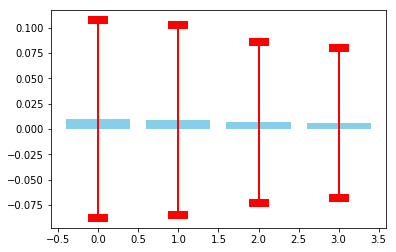

In [17]:
# plot the errors bar
values = average_error_p
errorValues = standard_deviation_error_p
plt.bar(range(len(values)), values, color = 'skyblue')
plt.errorbar(range(len(values)), values, yerr = errorValues,fmt = 'none', capsize = 10, ecolor = 'red', elinewidth = 2, capthick = 8)

## Comment ?

Unlike question one, we find that the larger the value of p, the smaller the interval defined by the standard deviation and also the smaller the error. So we can say that the larger p, the smaller the interval defined by the standard deviation.

# Real Data

In [18]:
#load data using pandas
iris_data = pd.read_csv('data/iris.data', delimiter=',')

In [19]:
#build a datafram pandas with name column
firts_line = iris_data.columns
iris_data.columns = ['Sepal Lenght', 'Sepal Width', 'Petal Lenght', 'Petal Width','Class']
df_new_line = pd.DataFrame([[float(firts_line[0]),float(firts_line[1]),float(firts_line[2]),float(firts_line[3]),firts_line[4]]], columns=['Sepal Lenght', 'Sepal Width', 'Petal Lenght', 'Petal Width','Class'] )
iris_data = pd.concat([df_new_line,iris_data], ignore_index=True)

In [20]:
# build the vector class and the vector data
Y = list()
for i in range(iris_data.shape[0]):
    if(iris_data["Class"].iloc[i] == "Iris-setosa"):
        Y.append(0)
        continue
    if(iris_data["Class"].iloc[i] == "Iris-versicolor"):
        Y.append(1)
        continue
    if(iris_data["Class"].iloc[i] == "Iris-virginica"):
        Y.append(2)
        continue

Y = np.array(Y)
X = iris_data.drop(['Class'], axis=1).values

In [21]:
# split the datafram iris two part : the training data size 80% and the testing data size 20%
msk = np.random.rand(len(iris_data)) < 0.8

iris_data_training = iris_data[msk]
iris_data_testing = iris_data[~msk]

print("iris_data_training size = ",iris_data_training.shape)
print("iris_data_testing size  = ",iris_data_testing.shape)

iris_data_training size =  (112, 5)
iris_data_testing size  =  (38, 5)


# 2.1 Application to binary classification

# Question 1

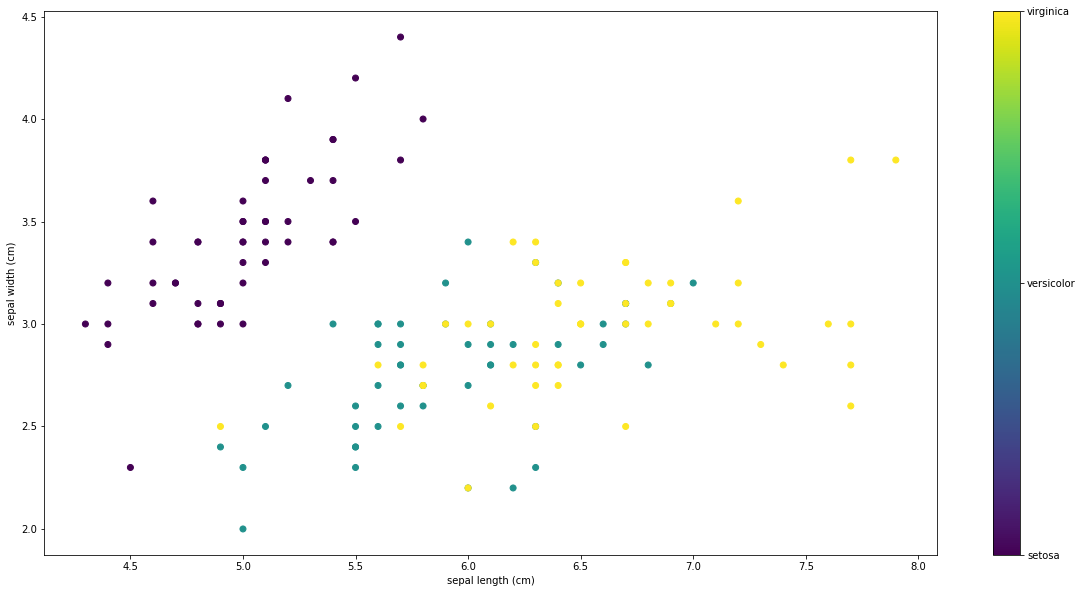

In [22]:
labels = [1, 2, 3]
classes = ['setosa','versicolor','virginica']

plt.figure(figsize=(20,10))
plt.scatter(iris_data['Sepal Lenght'], iris_data['Sepal Width'], c=Y)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

cb = plt.colorbar()
loc = np.arange(0,max(labels),max(labels)/float(len(classes)))
cb.set_ticks(loc)
cb.set_ticklabels(classes)

plt.show()

# Question 2 : 

In [23]:
iris_data_first_two_class =iris_data[iris_data["Class"] != "Iris-virginica"]
# build the vector class and the vector data
Y_two_class = list()
for i in range(iris_data_first_two_class.shape[0]):
    if(iris_data_first_two_class["Class"].iloc[i] == "Iris-setosa"):
        Y_two_class.append(0)
        continue
    if(iris_data_first_two_class["Class"].iloc[i] == "Iris-versicolor"):
        Y_two_class.append(1)
        continue
    
Y_two_class = np.array(Y_two_class)

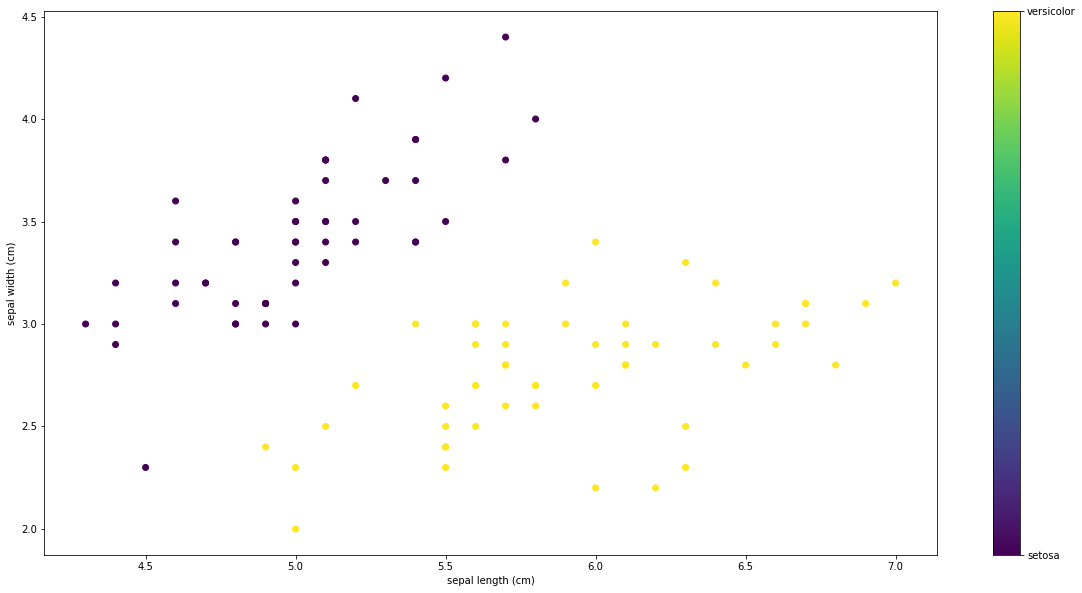

In [24]:
labels = [1, 2]
classes = ['setosa','versicolor']

plt.figure(figsize=(20,10))
plt.scatter(iris_data_first_two_class['Sepal Lenght'], iris_data_first_two_class['Sepal Width'], c=Y_two_class)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

cb = plt.colorbar()
loc = np.arange(0,max(labels),max(labels)/float(len(classes)))
cb.set_ticks(loc)
cb.set_ticklabels(classes)

plt.show()

In [25]:
#iris_data_first_two_class
X_two_class = iris_data_first_two_class.drop(['Class'], axis=1).values
Y_two_class = list()
for i in range(iris_data_first_two_class.shape[0]):
    if( iris_data_first_two_class["Class"].iloc[i] == "Iris-setosa"):
        Y_two_class.append(1)
    else:
        Y_two_class.append(0)

Y_two_class = np.array(Y_two_class)

In [35]:
# Train the perceptron algorithm with the data generated previously
X_training_two_class, X_testing_two_class, Y_training_two_class, Y_testing_two_class = train_test_split(X_two_class, Y_two_class, test_size=0.35)

W = np.zeros(5, dtype=int)
learningRates = 1

W, lossTraining = training(X_training_two_class, Y_training_two_class, W, learningRates)
print("Error Prediction Training == ", np.mean(np.array(lossTraining)))

Error Prediction Training ==  0.1076923076923077


In [36]:
# Visualization of data generated with the solution
y_predic_two_class = testing(X_testing_two_class, Y_testing_two_class, W)

accuraccy = np.sum(np.abs(y_predic_two_class - Y_testing_two_class))
accuraccy = accuraccy / X_test.shape[0]
print(" Accuracy Prediction Test == ",1-accuraccy)
print(" Error Prediction    Test == ",np.mean(np.abs(y_predic_two_class - Y_testing_two_class)))

 Accuracy Prediction Test ==  1.0
 Error Prediction    Test ==  0.0


### COMMENT
For a binary classification between the Iris-setosa and Iris-versicolor classes, the perceptron presents very good performances (the errors =0) . In fact, we observe in the graphic representation of the data that the two classes are linearly separated which justifies these good performances

# 2.2 (Optional) Application to multi-label classification

In [28]:
# the 3 class of the 3 binary classification
Y_One_Vs_all_class_Iris_setosa = list()
Y_One_Vs_all_class_Iris_versicolor = list()
Y_One_Vs_all_class_Iris_virginica = list()

# we build the 3 class
for i in range(iris_data.shape[0]):
    if(iris_data["Class"].iloc[i] == "Iris-setosa"):
        Y_One_Vs_all_class_Iris_setosa.append(1)
        Y_One_Vs_all_class_Iris_versicolor.append(0)
        Y_One_Vs_all_class_Iris_virginica.append(0)
        continue
    if(iris_data["Class"].iloc[i] == "Iris-versicolor"):
        Y_One_Vs_all_class_Iris_setosa.append(0)
        Y_One_Vs_all_class_Iris_versicolor.append(1)
        Y_One_Vs_all_class_Iris_virginica.append(0)
        continue
    if(iris_data["Class"].iloc[i] == "Iris-virginica"):
        Y_One_Vs_all_class_Iris_setosa.append(0)
        Y_One_Vs_all_class_Iris_versicolor.append(0)
        Y_One_Vs_all_class_Iris_virginica.append(1)
        continue
        
# we transform the list in a numpy vector
Y_One_Vs_all_class_Iris_setosa = np.array(Y_One_Vs_all_class_Iris_setosa)
Y_One_Vs_all_class_Iris_versicolor = np.array(Y_One_Vs_all_class_Iris_versicolor)
Y_One_Vs_all_class_Iris_virginica = np.array(Y_One_Vs_all_class_Iris_virginica)

# the array of patter
X = iris_data.drop(['Class'], axis=1).values

In [29]:
# weight of different class
W_class_Iris_setosa = np.zeros(5, dtype=int)
W_class_Iris_versicolor = np.zeros(5, dtype=int)
W_class_Iris_virginica = np.zeros(5, dtype=int)


In [30]:
def build_different_label(datafram):
    """this function take a datafram and build different label and array for training"""
    # the 3 class of the 3 binary classification
    Y_One_Vs_all_class_Iris_setosa = list()
    Y_One_Vs_all_class_Iris_versicolor = list()
    Y_One_Vs_all_class_Iris_virginica = list()

    # we build the 3 class
    for i in range(datafram.shape[0]):
        if(datafram["Class"].iloc[i] == "Iris-setosa"):
            Y_One_Vs_all_class_Iris_setosa.append(1)
            Y_One_Vs_all_class_Iris_versicolor.append(0)
            Y_One_Vs_all_class_Iris_virginica.append(0)
            continue
        if(datafram["Class"].iloc[i] == "Iris-versicolor"):
            Y_One_Vs_all_class_Iris_setosa.append(0)
            Y_One_Vs_all_class_Iris_versicolor.append(1)
            Y_One_Vs_all_class_Iris_virginica.append(0)
            continue
        if(datafram["Class"].iloc[i] == "Iris-virginica"):
            Y_One_Vs_all_class_Iris_setosa.append(0)
            Y_One_Vs_all_class_Iris_versicolor.append(0)
            Y_One_Vs_all_class_Iris_virginica.append(1)
            continue
        
    # we transform the list in a numpy vector
    Y_One_Vs_all_class_Iris_setosa = np.array(Y_One_Vs_all_class_Iris_setosa)
    Y_One_Vs_all_class_Iris_versicolor = np.array(Y_One_Vs_all_class_Iris_versicolor)
    Y_One_Vs_all_class_Iris_virginica = np.array(Y_One_Vs_all_class_Iris_virginica)

    # the array of patter
    X = datafram.drop(['Class'], axis=1).values
    
    return X, Y_One_Vs_all_class_Iris_setosa, Y_One_Vs_all_class_Iris_versicolor, Y_One_Vs_all_class_Iris_virginica




def initialize_weight(N):
    """This function buil the weight we will use for training"""
    # weight of different class
    W_class_Iris_setosa = np.zeros(N, dtype=int)
    W_class_Iris_versicolor = np.zeros(N, dtype=int)
    W_class_Iris_virginica = np.zeros(N, dtype=int)

    return W_class_Iris_setosa, W_class_Iris_versicolor, W_class_Iris_virginica




def training_one_vs_all(X, Y_One_Vs_all_class_Iris_setosa, Y_One_Vs_all_class_Iris_versicolor, Y_One_Vs_all_class_Iris_virginica, W_class_Iris_setosa, W_class_Iris_versicolor, W_class_Iris_virginica, learningRate):
    """This function train the one vs all model"""
    W_class_Iris_setosa, lossTraining = training(X, Y_One_Vs_all_class_Iris_setosa, W_class_Iris_setosa, learningRate)
    W_class_Iris_versicolor, lossTraining = training(X, Y_One_Vs_all_class_Iris_versicolor, W_class_Iris_versicolor, learningRate)
    W_class_Iris_virginica, lossTraining = training(X, Y_One_Vs_all_class_Iris_virginica, W_class_Iris_virginica, learningRate)
    
    return W_class_Iris_setosa, W_class_Iris_versicolor, W_class_Iris_virginica



def testing_test(X, W):
    """This function is used to predic a value the perceptron"""
    y_pred = list()
    X_training = add_the_biais_column(X)
    for i in range(X_training.shape[0]):
        # we compute the prediction based on X and the weights W
        y_pred.append(prediction(X_training[i], W))
        
    return y_pred



def testing_one_vs_all(X, W_class_Iris_setosa, W_class_Iris_versicolor, W_class_Iris_virginica):
    """We use this function to predict a furture label"""
    y_pred_one_vs_all = list()
    
    Y_class_Iris_setosa = testing_test(X, W_class_Iris_setosa)
    Y_class_Iris_versicolor = testing_test(X, W_class_Iris_versicolor)
    Y_class_Iris_virginica = testing_test(X, W_class_Iris_virginica)
    
    for i in range(X.shape[0]):
        if(Y_class_Iris_setosa[i] == 1):
            y_pred_one_vs_all.append(np.array([1,0,0]))
            continue
        if(Y_class_Iris_versicolor[i] == 1):
            y_pred_one_vs_all.append(np.array([0,1,0]))
            continue
        if(Y_class_Iris_virginica[i] == 1):
            y_pred_one_vs_all.append(np.array([0,0,1]))
            continue
            
    return y_pred_one_vs_all


In [31]:
# split the datafram iris two part : the training data size 80% and the testing data size 20%
msk = np.random.rand(len(iris_data)) < 0.8

iris_data_training = iris_data[msk]
iris_data_testing = iris_data[~msk]

print("iris_data_training size = ",iris_data_training.shape)
print("iris_data_testing size  = ",iris_data_testing.shape)


iris_data_training size =  (114, 5)
iris_data_testing size  =  (36, 5)


In [32]:
# the learning rate
learningRate = 1

# we build the label for traing
X, Y_One_Vs_all_class_Iris_setosa, Y_One_Vs_all_class_Iris_versicolor, Y_One_Vs_all_class_Iris_virginica = build_different_label(iris_data_training)

# we initialize the weight
W_class_Iris_setosa, W_class_Iris_versicolor, W_class_Iris_virginica = initialize_weight(5)

# Training the model
W_class_Iris_setosa, W_class_Iris_versicolor, W_class_Iris_virginica = training_one_vs_all(X, Y_One_Vs_all_class_Iris_setosa, Y_One_Vs_all_class_Iris_versicolor, Y_One_Vs_all_class_Iris_virginica, W_class_Iris_setosa, W_class_Iris_versicolor, W_class_Iris_virginica, learningRate)

In [33]:
#we build the label for testing
X_test, Y_One_Vs_all_class_Iris_setosa_test, Y_One_Vs_all_class_Iris_versicolor_test, Y_One_Vs_all_class_Iris_virginica_test = build_different_label(iris_data_testing)

# predict value
Y_One_Vs_all_class_Iris_test_predict = testing_one_vs_all(X_test, W_class_Iris_setosa, W_class_Iris_versicolor, W_class_Iris_virginica)

In [34]:
accuraccy = 0
# compute the accuracy
for i in range(len(X_test)):
    if(Y_One_Vs_all_class_Iris_setosa_test[i] == Y_One_Vs_all_class_Iris_test_predict[i][0]):
        if(Y_One_Vs_all_class_Iris_versicolor_test[i] == Y_One_Vs_all_class_Iris_test_predict[i][1]):
            if(Y_One_Vs_all_class_Iris_virginica_test[i] == Y_One_Vs_all_class_Iris_test_predict[i][2]):
                accuraccy+=1
                
accuraccy = accuraccy / X_test.shape[0]

print("The accuracy is == ",accuraccy)

The accuracy is ==  0.6666666666666666
